# Init models and load weights

In [1]:
import torch

from models import SwittiPipeline

device = 'cuda:0'

model_path = "yresearch/Switti"
pipe = SwittiPipeline.from_pretrained(model_path, device=device, torch_dtype=torch.bfloat16)


[constructor]  ==== fused_if_available=True (fusing_add_ln=0/30, fusing_mlp=0/30) ==== 
    [Switti config ] embed_dim=1920, num_heads=30, depth=30, mlp_ratio=4.0
    [drop ratios ] drop_rate=0.0, attn_drop_rate=0.0, drop_path_rate=0 (tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]))



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

2024-12-03 01:46:18.660593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733179578.676281  640361 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733179578.681071  640361 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 01:46:18.701093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


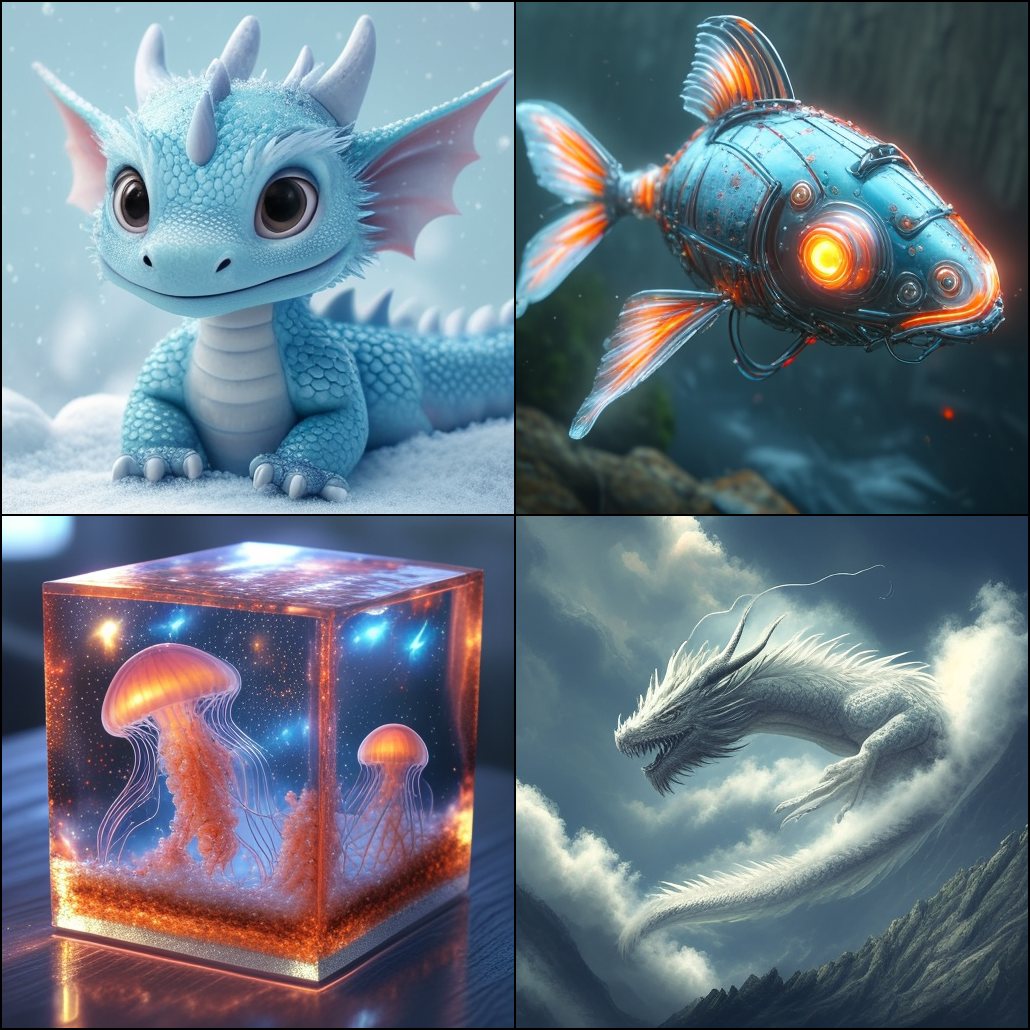

In [2]:
from torchvision.utils import make_grid
from calculate_metrics import to_PIL_image

prompts = ["Cute winter dragon baby, kawaii, Pixar, ultra detailed, glacial background, extremely realistic",
           "flying robot koi fish with armour plating, neon glowing eyes and wiring, 4k, unreal engine, marvel comics style",
           "sci-fi cosmic diarama of a quasar and jellyfish in a resin cube, volumetric lighting, high resolution, hdr, sharpen, Photorealism",
           "A cloud dragon flying over mountains, its body swirling with the wind.",
          ]
images = pipe(prompts,
              cfg=6.0,
              top_k=400,
              top_p=0.95,
              more_smooth=True,
              return_pil=False,
              smooth_start_si=2,
              turn_on_cfg_start_si=2,
              turn_off_cfg_start_si=8,
              last_scale_temp=0.1,
              seed=59,
             )
to_PIL_image(make_grid([img.float() for img in images], nrow=2))